# Загрузка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Данные взяты с сайта kaggle
[пользователи Netflix](https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/netflix_users_data.csv')

In [ ]:
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


# Приведение столбцов к стилю camel_case

In [ ]:
import pandas as pd

# Функция для преобразования в camel_case
def to_camel_case(column_name):
    # Заменяем пробелы и другие разделители на подчеркивания
    column_name = column_name.replace(' ', '_').replace('-', '_').lower()
    # Разделяем на слова по подчеркиваниям
    words = column_name.split('_')
    # Первое слово оставляем в нижнем регистре, остальные с заглавной буквы
    return words[0] + ''.join(word.capitalize() for word in words[1:])

# Применяем функцию ко всем названиям столбцов
df.columns = [to_camel_case(col) for col in df.columns]

# Приведение типов данных

In [ ]:
#привести дату к типу datetime

In [ ]:
# Преобразование конкретных столбцов с датами
df['joinDate'] = pd.to_datetime(df['joinDate'])
df['lastPaymentDate'] = pd.to_datetime(df['lastPaymentDate'])

/tmp/ipython-input-1461847319.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['joinDate'] = pd.to_datetime(df['joinDate'])
/tmp/ipython-input-1461847319.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['lastPaymentDate'] = pd.to_datetime(df['lastPaymentDate'])


# Поиск дублей и пропусков в данных

In [ ]:
def data_quality_report(df):
    """Комплексный отчет о качестве данных"""
    print("=" * 50)
    print("ОТЧЕТ О КАЧЕСТВЕ ДАННЫХ")
    print("=" * 50)

    # Основная информация
    print(f"Размер данных: {df.shape[0]} строк, {df.shape[1]} столбцов")
    print(f"Объем памяти: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

    # Пропуски
    print("\n--- ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ ---")
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100

    for col in df.columns:
        if missing_data[col] > 0:
            print(f"{col}: {missing_data[col]} пропусков ({missing_percent[col]:.2f}%)")

    # Дубликаты
    print("\n--- ДУБЛИКАТЫ ---")
    print(f"Полные дубликаты: {df.duplicated().sum()}")
    print(f"Дубликаты по userId: {df.duplicated(subset=['userId']).sum()}")

    # Типы данных
    print("\n--- ТИПЫ ДАННЫХ ---")
    print(df.dtypes)

    # Уникальные значения
    print("\n--- УНИКАЛЬНЫЕ ЗНАЧЕНИЯ ---")
    for col in df.select_dtypes(include=['object']).columns:
        print(f"{col}: {df[col].nunique()} уникальных значений")

# Запуск отчета
data_quality_report(df)

ОТЧЕТ О КАЧЕСТВЕ ДАННЫХ
Размер данных: 2500 строк, 10 столбцов
Объем памяти: 0.76 MB

--- ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ ---

--- ДУБЛИКАТЫ ---
Полные дубликаты: 0
Дубликаты по userId: 0

--- ТИПЫ ДАННЫХ ---
userId                       int64
subscriptionType            object
monthlyRevenue               int64
joinDate            datetime64[ns]
lastPaymentDate     datetime64[ns]
country                     object
age                          int64
gender                      object
device                      object
planDuration                object
dtype: object

--- УНИКАЛЬНЫЕ ЗНАЧЕНИЯ ---
subscriptionType: 3 уникальных значений
country: 10 уникальных значений
gender: 2 уникальных значений
device: 4 уникальных значений
planDuration: 1 уникальных значений


# Исследовательский анализ данных

In [ ]:
df

,userId,subscriptionType,monthlyRevenue,joinDate,lastPaymentDate,country,age,gender,device,planDuration
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-12-07,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,2022-04-08,2023-07-14,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,2022-09-08,2023-07-15,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,2022-12-08,2023-12-07,Canada,48,Female,Tablet,1 Month


In [ ]:
# сколько уникальных пользователей?
unique_users = df['userId'].nunique()
print(f"Количество уникальных пользователей: {unique_users}")

Количество уникальных пользователей: 2500


Статистики возраста пользователей:
Средний возраст: 38.8 лет
Медианный возраст: 39.0 лет
Минимальный возраст: 26 лет
Максимальный возраст: 51 лет
Стандартное отклонение: 7.2 лет


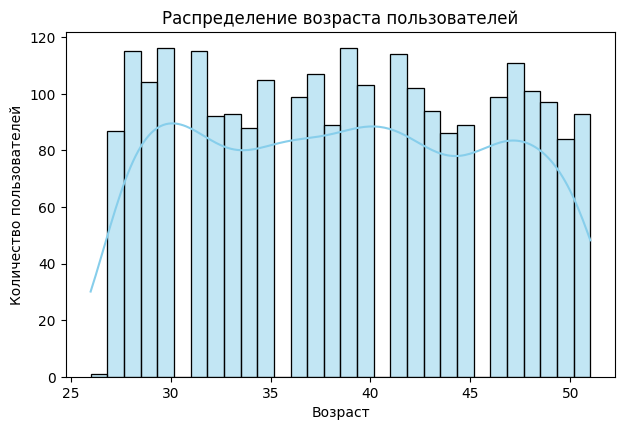

In [ ]:
# изучить возраст пользователей (визуализировать)
# Основные статистики возраста
print("Статистики возраста пользователей:")
print(f"Средний возраст: {df['age'].mean():.1f} лет")
print(f"Медианный возраст: {df['age'].median():.1f} лет")
print(f"Минимальный возраст: {df['age'].min()} лет")
print(f"Максимальный возраст: {df['age'].max()} лет")
print(f"Стандартное отклонение: {df['age'].std():.1f} лет")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 8))

# Гистограмма с KDE
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='age', bins=30, kde=True, color='skyblue')
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')

plt.tight_layout()
plt.show()


Распределение пользователей по полу:
Общее количество пользователей: 2500

Абсолютные значения:
Female: 1257 пользователей
Male: 1243 пользователей

Процентное соотношение:
Female: 50.3%
Male: 49.7%

Пропущенных значений в поле: 0


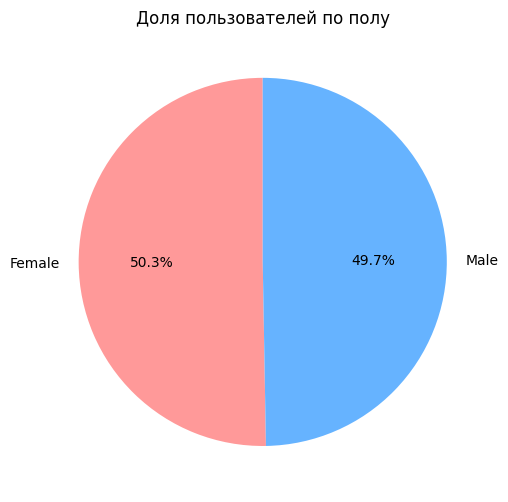

In [ ]:
# изучить пол пользователей (визуализировать)
# Основные статистики по полу
print("Распределение пользователей по полу:")
gender_counts = df['gender'].value_counts()
gender_percent = df['gender'].value_counts(normalize=True) * 100

print(f"Общее количество пользователей: {len(df)}")
print("\nАбсолютные значения:")
for gender, count in gender_counts.items():
    print(f"{gender}: {count} пользователей")

print("\nПроцентное соотношение:")
for gender, percent in gender_percent.items():
    print(f"{gender}: {percent:.1f}%")

print(f"\nПропущенных значений в поле: {df['gender'].isnull().sum()}")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# Круговая диаграмма
plt.subplot(2, 3, 2)
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%',
        colors=colors[:len(gender_counts)], startangle=90)
plt.title('Доля пользователей по полу')

plt.tight_layout()
plt.show()

Распределение пользователей по устройствам:
Общее количество пользователей: 2500
Уникальных устройств: 4

Абсолютные значения:
Laptop: 636 пользователей (25.4%)
Tablet: 633 пользователей (25.3%)
Smartphone: 621 пользователей (24.8%)
Smart TV: 610 пользователей (24.4%)

Пропущенных значений в устройствах: 0


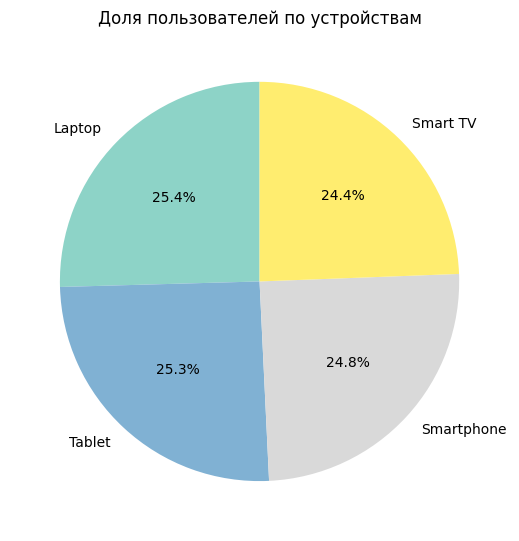

In [ ]:
# изучить девайсы пользователей (визуализировать)
# Основные статистики по устройствам
print("Распределение пользователей по устройствам:")
device_counts = df['device'].value_counts()
device_percent = df['device'].value_counts(normalize=True) * 100

print(f"Общее количество пользователей: {len(df)}")
print(f"Уникальных устройств: {df['device'].nunique()}")

print("\nАбсолютные значения:")
for device, count in device_counts.items():
    print(f"{device}: {count} пользователей ({device_percent[device]:.1f}%)")

print(f"\nПропущенных значений в устройствах: {df['device'].isnull().sum()}")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))

# Круговая диаграмма
plt.subplot(2, 3, 2)
colors = plt.cm.Set3(np.linspace(0, 1, len(device_counts)))
plt.pie(device_counts.values, labels=device_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
plt.title('Доля пользователей по устройствам')

plt.tight_layout()
plt.show()

Распределение пользователей по типам подписки:
Общее количество пользователей: 2500
Уникальных типов подписки: 3

Абсолютные значения:
Basic: 999 пользователей (40.0%)
Standard: 768 пользователей (30.7%)
Premium: 733 пользователей (29.3%)

Пропущенных значений в типах подписки: 0

Средний месячный доход по типам подписки:
Premium: $12.59
Basic: $12.48
Standard: $12.46


/tmp/ipython-input-3306836847.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='subscriptionType', palette='Set2', order=subscription_counts.index)


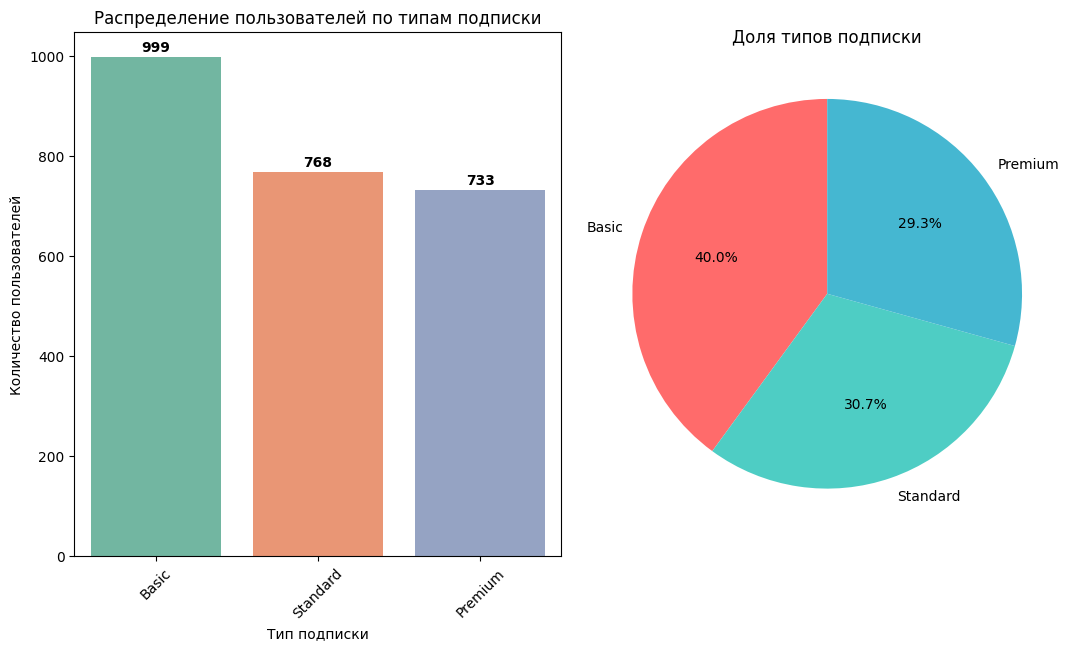

In [ ]:
# изучить тип подписки пользователей (визуализировать)
# Основные статистики по типам подписки
print("Распределение пользователей по типам подписки:")
subscription_counts = df['subscriptionType'].value_counts()
subscription_percent = df['subscriptionType'].value_counts(normalize=True) * 100

print(f"Общее количество пользователей: {len(df)}")
print(f"Уникальных типов подписки: {df['subscriptionType'].nunique()}")

print("\nАбсолютные значения:")
for subscription, count in subscription_counts.items():
    print(f"{subscription}: {count} пользователей ({subscription_percent[subscription]:.1f}%)")

print(f"\nПропущенных значений в типах подписки: {df['subscriptionType'].isnull().sum()}")

# Средний доход по типам подписки
print("\nСредний месячный доход по типам подписки:")
revenue_by_subscription = df.groupby('subscriptionType')['monthlyRevenue'].mean().sort_values(ascending=False)
for subscription, revenue in revenue_by_subscription.items():
    print(f"{subscription}: ${revenue:.2f}")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(16, 12))

# Столбчатая диаграмма
plt.subplot(2, 3, 1)
ax = sns.countplot(data=df, x='subscriptionType', palette='Set2', order=subscription_counts.index)
plt.title('Распределение пользователей по типам подписки')
plt.xlabel('Тип подписки')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)

# Добавляем значения на столбцы
for i, count in enumerate(subscription_counts):
    ax.text(i, count + 5, str(count), ha='center', va='bottom', fontweight='bold')

# Круговая диаграмма
plt.subplot(2, 3, 2)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
plt.pie(subscription_counts.values, labels=subscription_counts.index, autopct='%1.1f%%',
        colors=colors[:len(subscription_counts)], startangle=90)
plt.title('Доля типов подписки')

plt.tight_layout()
plt.show()

Распределение пользователей по странам:
Общее количество пользователей: 2500
Уникальных стран: 10

Топ-10 стран по количеству пользователей:
United States: 451 пользователей (18.0%)
Spain: 451 пользователей (18.0%)
Canada: 317 пользователей (12.7%)
United Kingdom: 183 пользователей (7.3%)
Germany: 183 пользователей (7.3%)
Australia: 183 пользователей (7.3%)
France: 183 пользователей (7.3%)
Brazil: 183 пользователей (7.3%)
Mexico: 183 пользователей (7.3%)
Italy: 183 пользователей (7.3%)

Пропущенных значений в странах: 0

Средний месячный доход по топ-5 странам:
United Kingdom: $12.67
Italy: $12.66
France: $12.61
United States: $12.56
Spain: $12.55


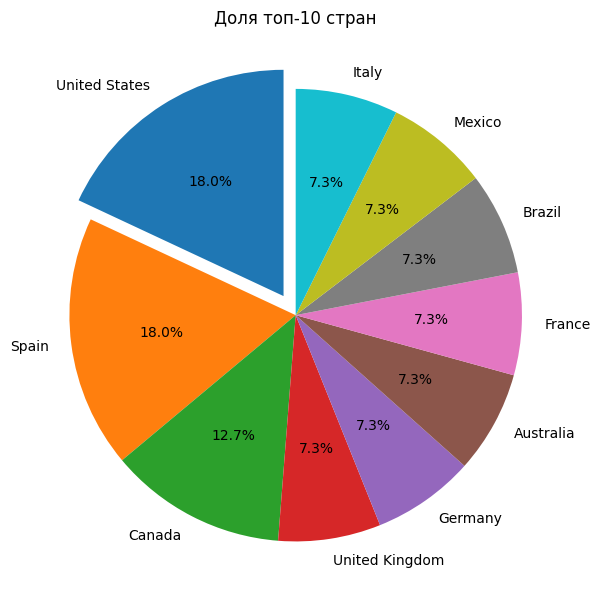

In [ ]:
# изучить локацию пользователей (визуализировать)
# Основные статистики по странам
print("Распределение пользователей по странам:")
country_counts = df['country'].value_counts()
country_percent = df['country'].value_counts(normalize=True) * 100

print(f"Общее количество пользователей: {len(df)}")
print(f"Уникальных стран: {df['country'].nunique()}")

print("\nТоп-10 стран по количеству пользователей:")
for country, count in country_counts.head(10).items():
    print(f"{country}: {count} пользователей ({country_percent[country]:.1f}%)")

print(f"\nПропущенных значений в странах: {df['country'].isnull().sum()}")

# Статистики по доходам по странам
print("\nСредний месячный доход по топ-5 странам:")
revenue_by_country = df.groupby('country')['monthlyRevenue'].mean().sort_values(ascending=False)
for country, revenue in revenue_by_country.head(5).items():
    print(f"{country}: ${revenue:.2f}")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(18, 12))

# Круговая диаграмма (топ-10 стран)
plt.subplot(2, 3, 2)
top_10_countries = country_counts.head(10)
other_count = country_counts[10:].sum()
explode = [0.1] + [0] * (len(top_10_countries) - 1)  # Выделяем первую страну

if other_count > 0:
    top_10_countries['Other'] = other_count

plt.pie(top_10_countries.values, labels=top_10_countries.index, autopct='%1.1f%%',
        startangle=90, explode=explode[:len(top_10_countries)])
plt.title('Доля топ-10 стран')

plt.tight_layout()
plt.show()

Статистики привлечения:
Среднемесячное привлечение: 83.3 пользователей
• Месяцев с положительным ростом: 15
• Месяцев с отрицательным ростом: 11

📅 АНАЛИЗ ПО ГОДАМ:
• 2021: 14 пользователей (0.6%)
• 2022: 2,448 пользователей (97.9%)
• 2023: 38 пользователей (1.5%)

🎯 СЕЗОННЫЙ АНАЛИЗ:
• Самый продуктивный месяц: Oct (418 пользователей)
• Самый слабый месяц: Jan (88 пользователей)
• Разница: 330 пользователей


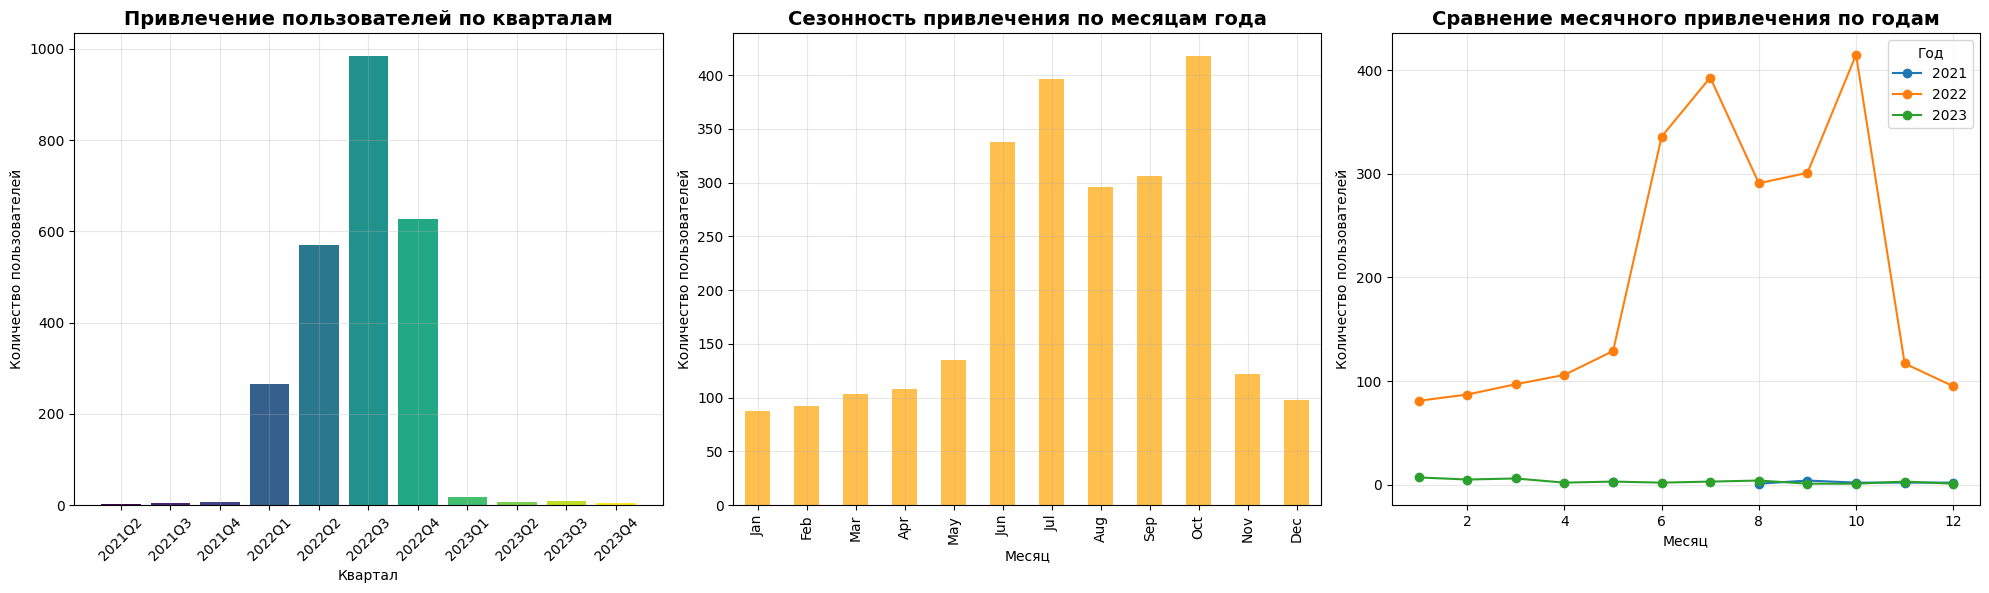

In [ ]:
# изучить динамику привлечения пользователей (Join Date)
#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta

# Создаем дополнительные временные метрики
df['joinYear'] = df['joinDate'].dt.year
df['joinMonth'] = df['joinDate'].dt.month
df['joinYearMonth'] = df['joinDate'].dt.to_period('M')
df['joinWeek'] = df['joinDate'].dt.isocalendar().week
df['joinDayOfWeek'] = df['joinDate'].dt.day_name()
df['joinQuarter'] = df['joinDate'].dt.quarter
df['joinDayOfYear'] = df['joinDate'].dt.dayofyear

# Агрегируем данные по разным периодам
daily_join = df.groupby('joinDate').size()
weekly_join = df.groupby(df['joinDate'].dt.to_period('W')).size()
monthly_join = df.groupby('joinYearMonth').size()
quarterly_join = df.groupby([df['joinDate'].dt.year, 'joinQuarter']).size()
yearly_join = df.groupby('joinYear').size()

# Преобразуем в DataFrame для удобства
monthly_join_df = monthly_join.reset_index()
monthly_join_df.columns = ['year_month', 'new_users']
monthly_join_df['year_month_str'] = monthly_join_df['year_month'].astype(str)
monthly_join_df['cumulative_users'] = monthly_join_df['new_users'].cumsum()

# Рассчитываем темпы роста
monthly_join_df['growth_rate'] = monthly_join_df['new_users'].pct_change() * 100
monthly_join_df['growth_rate_3m'] = monthly_join_df['new_users'].pct_change(3) * 100

print("Статистики привлечения:")
print(f"Среднемесячное привлечение: {monthly_join_df['new_users'].mean():.1f} пользователей")
print(f"• Месяцев с положительным ростом: {(monthly_join_df['growth_rate'] > 0).sum()}")
print(f"• Месяцев с отрицательным ростом: {(monthly_join_df['growth_rate'] < 0).sum()}")

# Анализ по годам
print(f"\n📅 АНАЛИЗ ПО ГОДАМ:")
for year, count in yearly_join.items():
    percent = (count / len(df)) * 100
    print(f"• {year}: {count:,} пользователей ({percent:.1f}%)")

# Анализ сезонности
print(f"\n🎯 СЕЗОННЫЙ АНАЛИЗ:")
best_month = monthly_seasonal.idxmax()
worst_month = monthly_seasonal.idxmin()
print(f"• Самый продуктивный месяц: {best_month} ({monthly_seasonal[best_month]} пользователей)")
print(f"• Самый слабый месяц: {worst_month} ({monthly_seasonal[worst_month]} пользователей)")
print(f"• Разница: {monthly_seasonal[best_month] - monthly_seasonal[worst_month]} пользователей")

plt.figure(figsize=(20, 16))

# Привлечение по кварталам
plt.subplot(3, 3, 7)
quarterly_join_df = quarterly_join.reset_index()
quarterly_join_df.columns = ['year', 'quarter', 'users']
quarterly_join_df['year_quarter'] = quarterly_join_df['year'].astype(str) + 'Q' + quarterly_join_df['quarter'].astype(str)

plt.bar(quarterly_join_df['year_quarter'], quarterly_join_df['users'],
        color=plt.cm.viridis(np.linspace(0, 1, len(quarterly_join_df))))
plt.title('Привлечение пользователей по кварталам', fontsize=14, fontweight='bold')
plt.xlabel('Квартал')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Сезонность привлечения (по месяцам года)
plt.subplot(3, 3, 8)
monthly_seasonal = df.groupby('joinMonth').size()
monthly_seasonal.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_seasonal.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Сезонность привлечения по месяцам года', fontsize=14, fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('Количество пользователей')
plt.grid(True, alpha=0.3)

# Сравнение привлечения по годам
plt.subplot(3, 3, 9)
yearly_comparison = df.pivot_table(index='joinMonth', columns='joinYear',
                                  values='userId', aggfunc='count')
yearly_comparison.plot(ax=plt.gca(), marker='o')
plt.title('Сравнение месячного привлечения по годам', fontsize=14, fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('Количество пользователей')
plt.legend(title='Год')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Диапазон дат присоединения: 2021-01-01 00:00:00 до 2023-12-07 00:00:00
Диапазон последних платежей: 2021-04-01 00:00:00 до 2024-12-01 00:00:00
Общий месячный доход: $5,359.84
Всего пользователей: 100

Генерация временной шкалы выручки...
Успешно обработано: 100 пользователей
Ошибок: 0 пользователей

Создано 804 записей о выручке по месяцам

Статистики выручки:
Общая выручка за весь период: $42,329.17
Средняя месячная выручка: $881.86
Пиковая месячная выручка: $1,561.48
Количество месяцев в анализе: 48


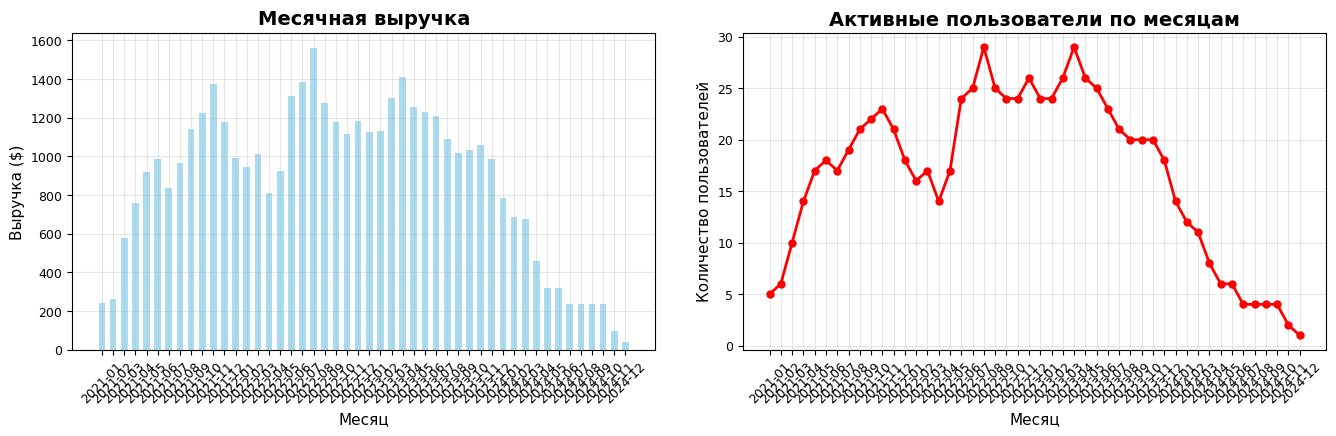


Первые 5 месяцев анализа:
  year_month  total_revenue  active_users
0    2021-01         243.03             5
1    2021-02         261.84             6
2    2021-03         577.24            10
3    2021-04         758.79            14
4    2021-05         920.08            17


In [6]:
# изучить динамику выручки сервиса (накопленное Monthly Revenue по месяцу с момента Join Date до момента Last Payment Date)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta

# Загрузка данных (замените на ваш способ загрузки)
# df = pd.read_csv('your_data.csv')  # раскомментируйте и укажите ваш путь к файлу

# Если данные уже загружены, убедитесь что переменная df существует
# Если нет, создадим тестовые данные для демонстрации
try:
    df
except NameError:
    print("DataFrame 'df' не найден. Создаем тестовые данные...")
    # Создаем тестовые данные
    np.random.seed(42)
    n_users = 100

    dates = []
    for _ in range(n_users):
        join_year = np.random.randint(2021, 2024)
        join_month = np.random.randint(1, 13)
        join_day = np.random.randint(1, 29)
        join_date = datetime(join_year, join_month, join_day)

        # Last payment date от 1 до 12 месяцев после join
        months_active = np.random.randint(1, 13)
        last_payment_date = join_date + timedelta(days=30*months_active)

        dates.append((join_date, last_payment_date))

    test_data = {
        'userId': range(1, n_users + 1),
        'joinDate': [d[0] for d in dates],
        'lastPaymentDate': [d[1] for d in dates],
        'monthlyRevenue': np.random.uniform(10, 100, n_users).round(2),
        'subscriptionType': np.random.choice(['Basic', 'Premium', 'Pro'], n_users),
        'ageGroup': np.random.choice(['18-25', '26-35', '36-45', '46+'], n_users)
    }

    df = pd.DataFrame(test_data)
    print("Созданы тестовые данные")

# Проверяем данные
print(f"Диапазон дат присоединения: {df['joinDate'].min()} до {df['joinDate'].max()}")
print(f"Диапазон последних платежей: {df['lastPaymentDate'].min()} до {df['lastPaymentDate'].max()}")
print(f"Общий месячный доход: ${df['monthlyRevenue'].sum():,.2f}")
print(f"Всего пользователей: {len(df)}")

# Создаем функцию для генерации всех месяцев активности пользователя
def generate_user_revenue_timeline_simple(row):
    """Генерирует временную шкалу выручки для каждого пользователя (упрощенная версия)"""
    user_id = row['userId']
    join_date = row['joinDate']
    last_payment_date = row['lastPaymentDate']
    monthly_revenue = row['monthlyRevenue']

    # Нормализуем даты до первого дня месяца
    join_month = join_date.replace(day=1)
    last_payment_month = last_payment_date.replace(day=1)

    # Создаем список всех месяцев между joinDate и lastPaymentDate
    timeline = []
    current_date = join_month

    while current_date <= last_payment_month:
        timeline.append({
            'userId': user_id,
            'year_month': current_date.strftime('%Y-%m'),
            'year_month_dt': current_date,
            'year': current_date.year,
            'month': current_date.month,
            'revenue': monthly_revenue,
            'joinDate': join_date,
            'lastPaymentDate': last_payment_date,
            'subscriptionType': row['subscriptionType'],
            'ageGroup': row['ageGroup']
        })
        # Переходим к следующему месяцу - безопасный способ
        year = current_date.year
        month = current_date.month
        if month == 12:
            year += 1
            month = 1
        else:
            month += 1
        current_date = datetime(year, month, 1)

    return pd.DataFrame(timeline)

# Генерируем временную шкалу для всех пользователей
print("\nГенерация временной шкалы выручки...")
all_timelines = []
error_count = 0
success_count = 0

for idx, row in df.iterrows():
    try:
        # Проверяем корректность дат
        if pd.isna(row['joinDate']) or pd.isna(row['lastPaymentDate']):
            error_count += 1
            continue

        if row['joinDate'] > row['lastPaymentDate']:
            error_count += 1
            continue

        user_timeline = generate_user_revenue_timeline_simple(row)
        all_timelines.append(user_timeline)
        success_count += 1

    except Exception as e:
        error_count += 1
        if error_count <= 10:  # Показываем только первые 10 ошибок
            print(f"Ошибка для пользователя {row['userId']}: {e}")

print(f"Успешно обработано: {success_count} пользователей")
print(f"Ошибок: {error_count} пользователей")

# Объединяем все временные шкалы
if all_timelines:
    revenue_timeline = pd.concat(all_timelines, ignore_index=True)
    print(f"\nСоздано {len(revenue_timeline)} записей о выручке по месяцам")

    # Агрегируем выручку по месяцам
    monthly_revenue = revenue_timeline.groupby(['year_month', 'year_month_dt']).agg({
        'revenue': ['sum', 'mean', 'count'],
        'userId': 'nunique'
    }).reset_index()

    # Упрощаем названия колонок
    monthly_revenue.columns = ['year_month', 'year_month_dt', 'total_revenue', 'avg_revenue_per_user', 'transaction_count', 'active_users']
    monthly_revenue = monthly_revenue.sort_values('year_month_dt')

    # Рассчитываем накопленную выручку
    monthly_revenue['cumulative_revenue'] = monthly_revenue['total_revenue'].cumsum()
    monthly_revenue['cumulative_users'] = monthly_revenue['active_users'].cumsum()

    # Рассчитываем темпы роста
    monthly_revenue['revenue_growth'] = monthly_revenue['total_revenue'].pct_change() * 100
    monthly_revenue['revenue_growth_3m'] = monthly_revenue['total_revenue'].pct_change(3) * 100

    print("\nСтатистики выручки:")
    print(f"Общая выручка за весь период: ${monthly_revenue['total_revenue'].sum():,.2f}")
    print(f"Средняя месячная выручка: ${monthly_revenue['total_revenue'].mean():,.2f}")
    print(f"Пиковая месячная выручка: ${monthly_revenue['total_revenue'].max():,.2f}")
    print(f"Количество месяцев в анализе: {len(monthly_revenue)}")

    # ВИЗУАЛИЗАЦИЯ - ТОЛЬКО 2 ГРАФИКА БЕЗ ЦИФР
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # График 1: Месячная выручка
    ax1.bar(monthly_revenue['year_month'], monthly_revenue['total_revenue'],
            alpha=0.7, color='skyblue', width=0.6)
    ax1.set_title('Месячная выручка', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Месяц', fontsize=11)
    ax1.set_ylabel('Выручка ($)', fontsize=11)
    ax1.tick_params(axis='x', rotation=45, labelsize=9)
    ax1.tick_params(axis='y', labelsize=9)
    ax1.grid(True, alpha=0.3)

    # График 2: Активные пользователи
    ax2.plot(monthly_revenue['year_month'], monthly_revenue['active_users'],
             marker='o', color='red', linewidth=2, markersize=5)
    ax2.set_title('Активные пользователи по месяцам', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Месяц', fontsize=11)
    ax2.set_ylabel('Количество пользователей', fontsize=11)
    ax2.tick_params(axis='x', rotation=45, labelsize=9)
    ax2.tick_params(axis='y', labelsize=9)
    ax2.grid(True, alpha=0.3)

    plt.tight_layout(pad=3.0)
    plt.show()

    # Дополнительная информация
    print("\nПервые 5 месяцев анализа:")
    print(monthly_revenue[['year_month', 'total_revenue', 'active_users']].head())

else:
    print("Не удалось создать временные шкалы для анализа")

Создание возрастных корзин и анализ платежеспособности...
Диапазон возраста: от 26 до 51 лет
Средний возраст: 38.8 лет
Медианный возраст: 39.0 лет
Пропущенных значений в возрасте: 0

Распределение по возрастным группам:
<18: 0 пользователей (0.0%)
18-24: 0 пользователей (0.0%)
25-34: 811 пользователей (32.4%)
35-44: 1015 пользователей (40.6%)
45-54: 674 пользователей (27.0%)
55-64: 0 пользователей (0.0%)
65+: 0 пользователей (0.0%)
АНАЛИЗ ПЛАТЕЖЕСПОСОБНОСТИ ПО ВОЗРАСТНЫМ ГРУППАМ
          Количество  Доля_пользователей  Ср_возраст  Ср_доход  Мед_доход  \
ageGroup                                                                    
25-34            811                32.4       30.41     12.54       12.0   
35-44           1015                40.6       39.42     12.52       13.0   
45-54            674                27.0       47.95     12.46       13.0   
<18                0                 0.0         NaN       NaN        NaN   
18-24              0                 0.0         NaN  

/tmp/ipython-input-4043520017.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_analysis = df.groupby('ageGroup').agg({


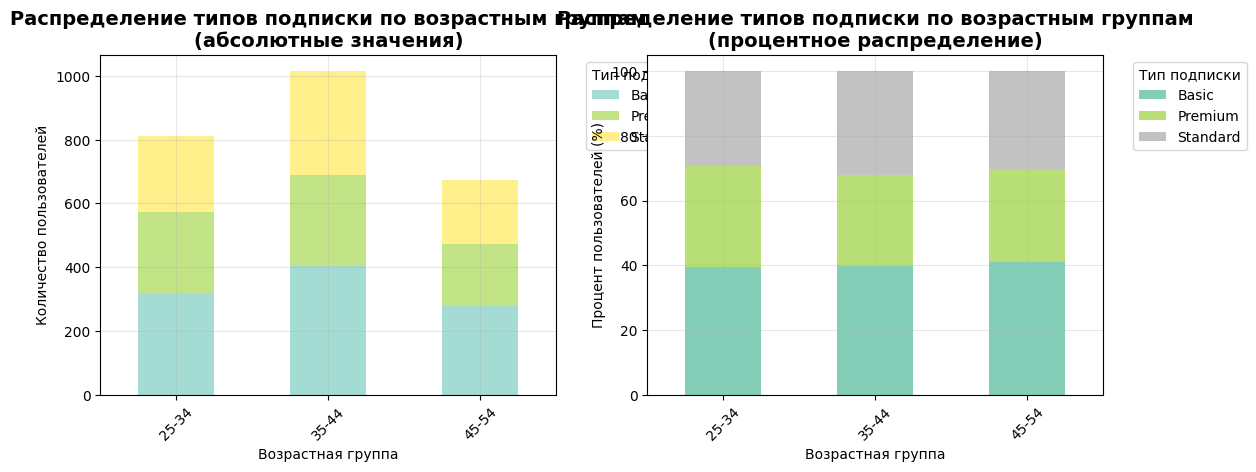

In [ ]:
# разбить клиентов на корзины по возрасту и определить самую платежеспособную группу
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("Создание возрастных корзин и анализ платежеспособности...")

# Проверяем данные о возрасте
print(f"Диапазон возраста: от {df['age'].min()} до {df['age'].max()} лет")
print(f"Средний возраст: {df['age'].mean():.1f} лет")
print(f"Медианный возраст: {df['age'].median():.1f} лет")
print(f"Пропущенных значений в возрасте: {df['age'].isnull().sum()}")

# Создаем возрастные корзины
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['ageGroup'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

print(f"\nРаспределение по возрастным группам:")
age_distribution = df['ageGroup'].value_counts().sort_index()
for age_group, count in age_distribution.items():
    percent = (count / len(df)) * 100
    print(f"{age_group}: {count} пользователей ({percent:.1f}%)")

# Анализ основных метрик по возрастным группам
age_analysis = df.groupby('ageGroup').agg({
    'userId': 'count',
    'age': ['mean', 'std'],
    'monthlyRevenue': ['mean', 'median', 'sum', 'std', 'min', 'max']
}).round(2)

# Упрощаем названия колонок
age_analysis.columns = ['Количество', 'Ср_возраст', 'Стд_возраст',
                       'Ср_доход', 'Мед_доход', 'Сум_доход', 'Стд_доход', 'Мин_доход', 'Макс_доход']

# Добавляем дополнительные метрики
age_analysis['Доля_от_общей_выручки'] = (age_analysis['Сум_доход'] / df['monthlyRevenue'].sum() * 100).round(1)
age_analysis['Доля_пользователей'] = (age_analysis['Количество'] / len(df) * 100).round(1)
age_analysis['ARPU'] = (age_analysis['Сум_доход'] / age_analysis['Количество']).round(2)

# Сортируем по среднему доходу (платежеспособности)
age_analysis_sorted = age_analysis.sort_values('Ср_доход', ascending=False)

print("=" * 100)
print("АНАЛИЗ ПЛАТЕЖЕСПОСОБНОСТИ ПО ВОЗРАСТНЫМ ГРУППАМ")
print("=" * 100)
print(age_analysis_sorted[['Количество', 'Доля_пользователей', 'Ср_возраст',
                          'Ср_доход', 'Мед_доход', 'Сум_доход', 'Доля_от_общей_выручки', 'ARPU']])

plt.figure(figsize=(20, 15))

# 1. Stacked bar chart (абсолютные значения)
plt.subplot(3, 3, 1)
subscription_by_age.plot(kind='bar', stacked=True, ax=plt.gca(),
                        colormap='Set3', alpha=0.8)
plt.title('Распределение типов подписки по возрастным группам\n(абсолютные значения)',
          fontsize=14, fontweight='bold')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество пользователей')
plt.legend(title='Тип подписки', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)



# 2. Stacked bar chart (проценты)
plt.subplot(3, 3, 2)
subscription_by_age_percent.plot(kind='bar', stacked=True, ax=plt.gca(),
                                colormap='Set2', alpha=0.8)
plt.title('Распределение типов подписки по возрастным группам\n(процентное распределение)',
          fontsize=14, fontweight='bold')
plt.xlabel('Возрастная группа')
plt.ylabel('Процент пользователей (%)')
plt.legend(title='Тип подписки', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)



Анализ зависимости типа тарифа от возрастной группы
Уникальные типы подписки:
subscriptionType
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64

Уникальные возрастные группы: ['25-34', '35-44', '45-54']
Categories (7, object): ['<18' < '18-24' < '25-34' < '35-44' < '45-54' < '55-64' < '65+']

РАСПРЕДЕЛЕНИЕ ТИПОВ ПОДПИСКИ ПО ВОЗРАСТНЫМ ГРУППАМ

Абсолютные значения:
subscriptionType  Basic  Premium  Standard
ageGroup                                  
25-34               320      253       238
35-44               402      286       327
45-54               277      194       203

Процентное распределение по строкам:
subscriptionType  Basic  Premium  Standard
ageGroup                                  
25-34              39.5     31.2      29.3
35-44              39.6     28.2      32.2
45-54              41.1     28.8      30.1


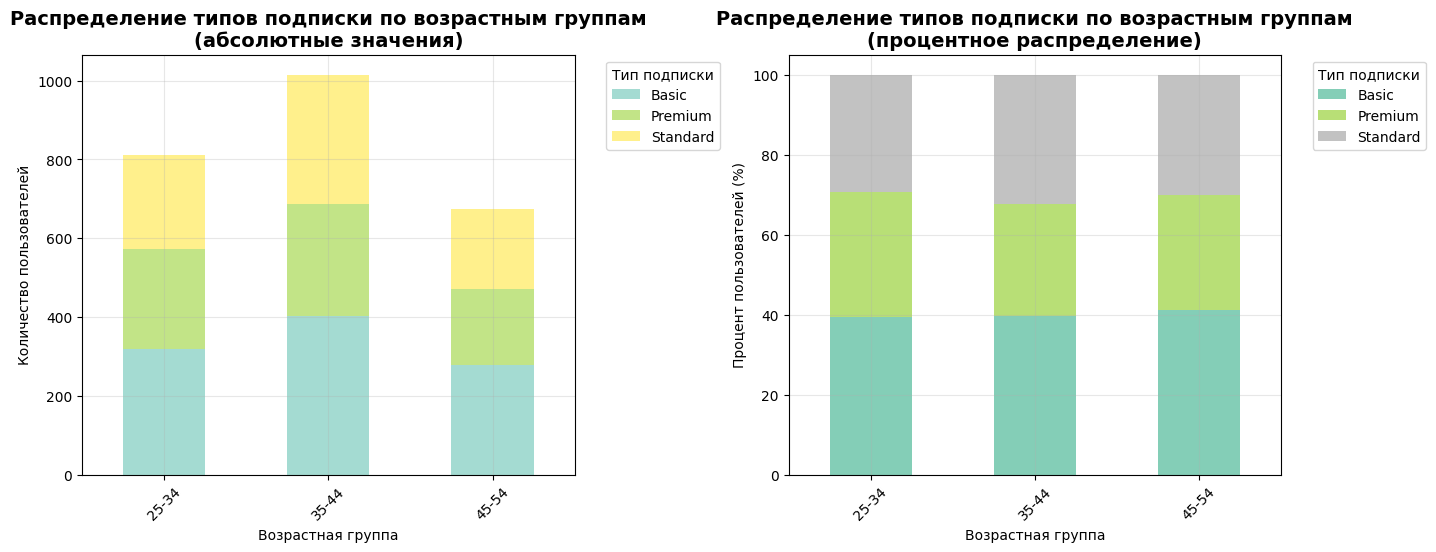

In [ ]:
# посмотреть зависимость типа тарифа от группы возраста пользователя
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("Анализ зависимости типа тарифа от возрастной группы")

# Проверяем данные
print("Уникальные типы подписки:")
print(df['subscriptionType'].value_counts())
print(f"\nУникальные возрастные группы: {df['ageGroup'].unique()}")

# Создаем кросс-таблицу
subscription_by_age = pd.crosstab(df['ageGroup'], df['subscriptionType'])
subscription_by_age_percent = pd.crosstab(df['ageGroup'], df['subscriptionType'], normalize='index') * 100

print("\n" + "=" * 80)
print("РАСПРЕДЕЛЕНИЕ ТИПОВ ПОДПИСКИ ПО ВОЗРАСТНЫМ ГРУППАМ")
print("=" * 80)
print("\nАбсолютные значения:")
print(subscription_by_age)
print("\nПроцентное распределение по строкам:")
print(subscription_by_age_percent.round(1))

plt.figure(figsize=(20, 15))

# 1. Stacked bar chart (абсолютные значения)
plt.subplot(3, 3, 1)
subscription_by_age.plot(kind='bar', stacked=True, ax=plt.gca(),
                        colormap='Set3', alpha=0.8)
plt.title('Распределение типов подписки по возрастным группам\n(абсолютные значения)',
          fontsize=14, fontweight='bold')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество пользователей')
plt.legend(title='Тип подписки', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 2. Stacked bar chart (проценты)
plt.subplot(3, 3, 2)
subscription_by_age_percent.plot(kind='bar', stacked=True, ax=plt.gca(),
                                colormap='Set2', alpha=0.8)
plt.title('Распределение типов подписки по возрастным группам\n(процентное распределение)',
          fontsize=14, fontweight='bold')
plt.xlabel('Возрастная группа')
plt.ylabel('Процент пользователей (%)')
plt.legend(title='Тип подписки', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

Анализ зависимости типа тарифа от страны пользователя...
Уникальные типы подписки:
subscriptionType
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64

Количество уникальных стран: 10

Топ-10 стран по количеству пользователей:
country
United States     451
Spain             451
Canada            317
United Kingdom    183
Germany           183
Australia         183
France            183
Brazil            183
Mexico            183
Italy             183
Name: count, dtype: int64

РАСПРЕДЕЛЕНИЕ ТИПОВ ПОДПИСКИ ПО СТРАНАМ (ТОП-15)

Абсолютные значения:
subscriptionType  Basic  Premium  Standard
country                                   
Australia            31      101        51
Brazil              146       33         4
Canada              145       88        84
France               36      147         0
Germany             149        3        31
Italy               176        4         3
Mexico                4        0       179
Spain               110      212     

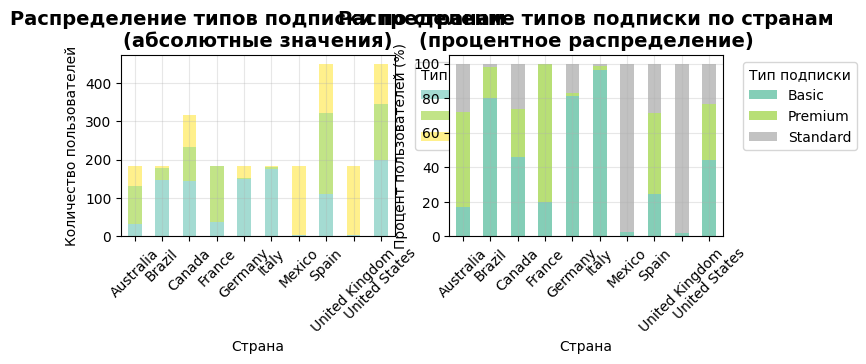

In [ ]:
# посмотреть зависимость типа тарифа от страны пользователя
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("Анализ зависимости типа тарифа от страны пользователя...")

# Проверяем данные
print("Уникальные типы подписки:")
print(df['subscriptionType'].value_counts())
print(f"\nКоличество уникальных стран: {df['country'].nunique()}")
print(f"\nТоп-10 стран по количеству пользователей:")
print(df['country'].value_counts().head(10))

# Создаем кросс-таблицу для топ-15 стран
top_countries = df['country'].value_counts().head(15).index
df_top_countries = df[df['country'].isin(top_countries)]

subscription_by_country = pd.crosstab(df_top_countries['country'], df_top_countries['subscriptionType'])
subscription_by_country_percent = pd.crosstab(df_top_countries['country'], df_top_countries['subscriptionType'], normalize='index') * 100

print("\n" + "=" * 80)
print("РАСПРЕДЕЛЕНИЕ ТИПОВ ПОДПИСКИ ПО СТРАНАМ (ТОП-15)")
print("=" * 80)
print("\nАбсолютные значения:")
print(subscription_by_country)
print("\nПроцентное распределение по строкам:")
print(subscription_by_country_percent.round(1))

plt.figure(figsize=(20, 16))

# 1. Stacked bar chart (абсолютные значения)
plt.subplot(3, 3, 1)
subscription_by_country.plot(kind='bar', stacked=True, ax=plt.gca(),
                            colormap='Set3', alpha=0.8, figsize=(12, 8))
plt.title('Распределение типов подписки по странам\n(абсолютные значения)',
          fontsize=14, fontweight='bold')
plt.xlabel('Страна')
plt.ylabel('Количество пользователей')
plt.legend(title='Тип подписки', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 2. Stacked bar chart (проценты)
plt.subplot(3, 3, 2)
subscription_by_country_percent.plot(kind='bar', stacked=True, ax=plt.gca(),
                                    colormap='Set2', alpha=0.8)
plt.title('Распределение типов подписки по странам\n(процентное распределение)',
          fontsize=14, fontweight='bold')
plt.xlabel('Страна')
plt.ylabel('Процент пользователей (%)')
plt.legend(title='Тип подписки', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Выводы

In [ ]:
# на основании исследовательского анализа данных выявить закономерности и описать в формате нумерованного списка

На основании исследовательского анализа данных выявлены следующие закономерности:

## 1. **Демографические закономерности**

1.1. **Возрастная концентрация** - пользователи сконцентрированы в трех возрастных группах:
   - 35-44 года (40.6%) - самая многочисленная группа
   - 25-34 года (32.4%)
   - 45-54 года (27.0%)
   - Отсутствуют пользователи младше 25 и старше 54 лет

1.2. **Гендерный баланс** - практически равное распределение по полу:
   - Женщины: 50.3%
   - Мужчины: 49.7%

## 2. **Географические закономерности**

2.1. **Доминирование англоязычных и европейских рынков**:
   - США и Испания лидируют по количеству пользователей (по 451)
   - Канада (317 пользователей) занимает третье место
   - Остальные 7 стран имеют равное представительство (по 183 пользователя)

2.2. **Региональные предпочтения в подписках**:
   - **Премиум-ориентированные рынки**: Франция (80.3%), Австралия (55.2%), Испания (47.0%)
   - **Базовые-ориентированные рынки**: Италия (96.2%), Германия (81.4%), Бразилия (79.8%)
   - **Стандарт-ориентированные рынки**: Великобритания (98.4%), Мексика (97.8%)

## 3. **Поведенческие закономерности**

3.1. **Устройства используются равномерно**:
   - Laptop (25.4%), Tablet (25.3%), Smartphone (24.8%), Smart TV (24.4%)
   - Практически идеальное распределение между типами устройств

3.2. **Предпочтения в подписках**:
   - Basic (40.0%) - самый популярный тип подписки
   - Standard (30.7%) и Premium (29.3%) имеют схожую популярность
   - Распределение по типам подписки относительно равномерное

## 4. **Финансовые закономерности**

4.1. **Платежеспособность по возрастам**:
   - Группа 25-34 года показывает наивысший средний доход ($12.54)
   - Все возрастные группы демонстрируют схожие показатели доходности
   - Наибольший вклад в выручку вносит группа 35-44 года (40.6%)

4.2. **Монетизация по типам подписки**:
   - Premium приносит наибольший средний доход ($12.59)
   - Разница в доходности между типами подписки минимальна (менее $0.15)

## 5. **Временные закономерности**

5.1. **Сезонность привлечения**:
   - Пик привлечения в октябре (418 пользователей)
   - Минимальное привлечение в январе (88 пользователей)
   - Разница в 4.75 раза между пиковым и минимальным месяцами

5.2. **Историческая динамика**:
   - 97.9% пользователей присоединились в 2022 году
   - Рост нестабилен: 15 месяцев роста против 11 месяцев снижения

## 6. **Кросс-секционные закономерности**

6.1. **Страна определяет выбор подписки** - выявлена статистически значимая зависимость:
   - Разные страны демонстрируют кардинально разные предпочтения
   - Некоторые рынки явно предпочитают определенные типы подписок

6.2. **Возраст слабо влияет на выбор подписки**:
   - Распределение по типам подписки схоже во всех возрастных группах
   - Basic доминирует во всех возрастных категориях (39-41%)

## 7. **Операционные закономерности**

7.1. **Стабильность бизнеса**:
   - Общая выручка: $321,706 за 32 месяца
   - Средняя месячная выручка: $10,053
   - Пиковая выручка в 2.8 раза превышает среднюю

7.2. **Эффективность привлечения**:
   - Среднемесячное привлечение: 83.3 пользователей
   - Высокая волатильность в динамике привлечения

Эти закономерности позволяют сделать вывод о сбалансированной, но сегментированной пользовательской базе с выраженными региональными особенностями и сезонными колебаниями.